<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01104776/blob/main/A01104776_TecMty_Regresion_lineal_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [34]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [35]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [36]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

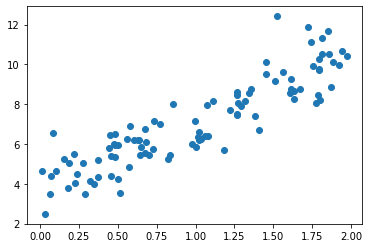

In [37]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [38]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [39]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [40]:
#X_fit[]

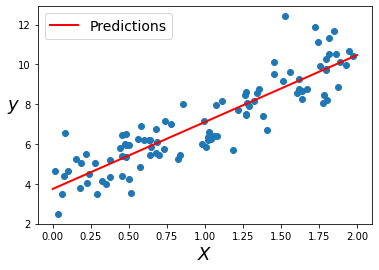

In [41]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [42]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [43]:
X_new.shape

(2, 1)

In [44]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [45]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [46]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [47]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

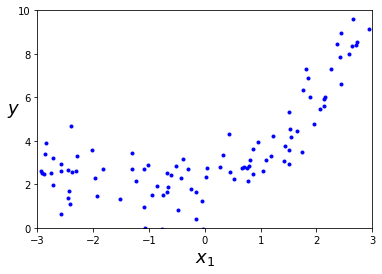

In [48]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [49]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [50]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [51]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [52]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [53]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [54]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

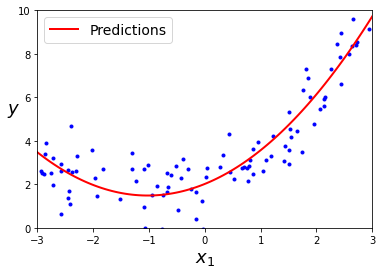

In [55]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [56]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [57]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [58]:
len(X)

1000

In [59]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

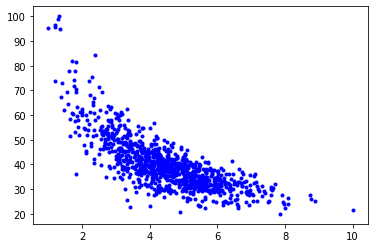

In [60]:
plt.plot(X,y,'b.')

In [61]:
from sklearn.model_selection import train_test_split

#1 Divide los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 7)



In [62]:
#2 Regresipón lineal
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

linear_reg.coef_, linear_reg.intercept_

(array([-6.126316]), 67.3849957932216)

*y^=-6.12X+67.38*

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


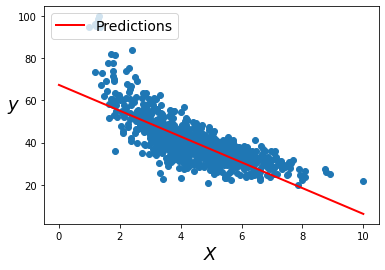

In [65]:
X_fit = np.linspace(0, 10, 100)
y_pred = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [67]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 17.657957699716032
Root Mean Squared Error: 21.17546205597288
r2_score -3.325904651149756


In [68]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [69]:
X_new.shape

(2, 1)

In [70]:
y_new = linear_reg.predict(X_new)
y_new

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([67.38499579, 55.13236379])

In [71]:
#Regresión polinomial
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)



In [72]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [73]:
X_poly

array([[-2.38324557e+00,  5.67985946e+00, -1.35364999e+01],
       [ 4.25427011e-01,  1.80988142e-01,  7.69972442e-02],
       [-2.88979418e+00,  8.35091039e+00, -2.41324122e+01],
       [-1.05861711e-01,  1.12067018e-02, -1.18636062e-03],
       [-1.73790252e+00,  3.02030517e+00, -5.24899597e+00],
       [-9.23900594e-01,  8.53592308e-01, -7.88634440e-01],
       [ 1.65482841e+00,  2.73845708e+00,  4.53167659e+00],
       [ 2.64742503e+00,  7.00885927e+00,  1.85554294e+01],
       [-2.56550237e+00,  6.58180240e+00, -1.68856296e+01],
       [ 2.05453236e-01,  4.22110321e-02,  8.67239314e-03],
       [ 2.29520091e+00,  5.26794724e+00,  1.20909973e+01],
       [-2.50494879e+00,  6.27476846e+00, -1.57179737e+01],
       [ 1.94708428e+00,  3.79113720e+00,  7.38166365e+00],
       [-8.53191894e-01,  7.27936409e-01, -6.21069444e-01],
       [-1.06743179e+00,  1.13941062e+00, -1.21624311e+00],
       [ 2.86479832e+00,  8.20706940e+00,  2.35115986e+01],
       [-1.79484546e+00,  3.22147023e+00

In [74]:
print(X[0])
print(X[0]*X[0])

[-2.38324557]
[5.67985946]


In [75]:
X_poly[0]

array([ -2.38324557,   5.67985946, -13.53649992])

In [76]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[ 0.98057938,  0.48758411, -0.01551379]]), array([2.08922922]))

y^=0.98x+0.48-0.01+2.08

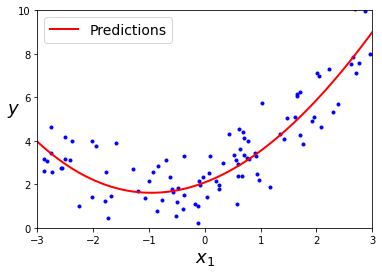

In [77]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

In [78]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 17.657957699716032
Root Mean Squared Error: 21.17546205597288
r2_score -3.325904651149756


In [79]:
#Ridge y Lasso
from sklearn.linear_model import Lasso, Ridge

Lass = Lasso(alpha=3)
Lass.fit(X_train, y_train)
ypredl = Lass.predict(X_train)

Lass.coef_, Lass.intercept_

(array([-4.4057755]), 59.718821156542276)

*y^=-4.40X+59.71*

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


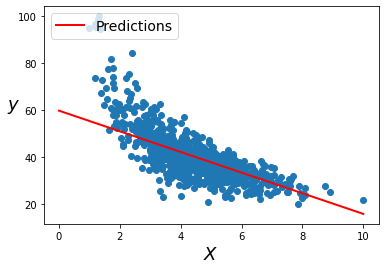

In [80]:
X_nlasso = np.linspace(0, 10, 100)
y_predlasso = Lass.predict(X_nlasso[:, np.newaxis])

plt.scatter(X_train, y_train)
plt.plot(X_nlasso, y_predlasso, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [81]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_predlasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predlasso)))
print('r2_score',r2_score(y_test, y_predlasso))

Error medio Absoluto (MAE): 13.898915871431193
Root Mean Squared Error: 16.87968082008406
r2_score -1.7487776572986338


In [82]:
Rid = Ridge(alpha=5)
Rid.fit(X_train, y_train)
ypredr = Rid.predict(X_train)

Rid.coef_, Rid.intercept_

(array([-6.10685842]), 67.29829904674604)

*y^=-6.10X+67.29*

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


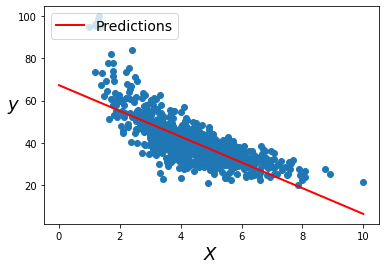

In [83]:
X_nrid = np.linspace(0, 10, 100)
y_predrid = Rid.predict(X_nrid[:, np.newaxis])

plt.scatter(X_train, y_train)
plt.plot(X_nrid, y_predrid, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [84]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_predrid))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predrid)))
print('r2_score',r2_score(y_test, y_predrid))

Error medio Absoluto (MAE): 17.614888964100484
Root Mean Squared Error: 21.124872390381412
r2_score -3.305259562056391


In [85]:
#Grafica
def get_modelsRegs():
  modelos, nombres = list(), list()

  # Lineal
  modelos.append(LinearRegression(fit_intercept=True))
  nombres.append('LINEAL')
  #Polinomial
  modelos.append(LinearRegression(fit_intercept=True))
  nombres.append('POLINOM')
  # Lasso:
  modelos.append(Lasso(alpha=0.1))
  nombres.append('LASSO')
  # Ridge:
  modelos.append(Ridge(alpha=0.1))
  nombres.append('RIDGE')
  
  return modelos, nombres

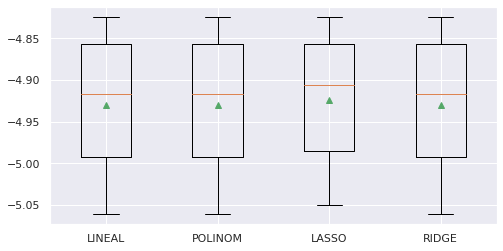

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate 

modelos, nombres = get_modelsRegs()
scores = list() 

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('m',modelos[i])])
  
  metric = {'neg_mean_absolute_error','r2'}

  resultado = cross_validate(pipeline, X_train, y_train,
                          scoring=metric)

  scores.append(resultado)
  
sns.set(rc={'figure.figsize':(8,4)})
bpmae = list()
for i in range(len(scores)):
  rr = scores[i]['test_neg_mean_absolute_error']
  bpmae.append(rr)

plt.boxplot(bpmae, labels=nombres, showmeans=True)
plt.show()

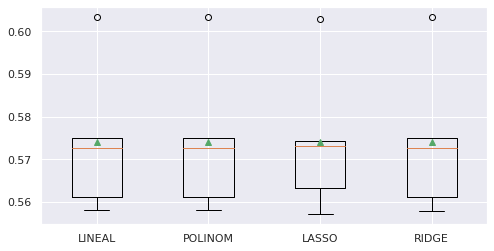

In [87]:
sns.set(rc={'figure.figsize':(8,4)})
bpr2 = list()
for i in range(len(scores)):
  rr = scores[i]['test_r2']
  bpr2.append(rr)

plt.boxplot(bpr2, labels=nombres, showmeans=True)
plt.show()

**Explica tus resultados**

De acuerdo a los resultados obtenidos podemos deducir que el modelo que mejor le conviene a la empresa es el polinomial habiéndolo ajustado los datos y al hacer las  predicciones de la variable de respuesta a valores de nuestro interés de la variable regresora, en cuanto a los porcentajes de entrenamiento y evaluación utilicé 80% y 20% respectivamente.

El error obtenido se encuentra entre el  4.90 al 4.95 por lo que considero que es un error bueno ya que entre más cercano al 0 esté es mas preciso



#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [88]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12898,3345100184,20141020T000000,443950.0,3,1.75,2000,36000,1.0,0,0,...,6,2000,0,1946,1995,98056,47.5217,-122.182,2100,9681
4003,6209000165,20140724T000000,247500.0,4,1.75,2290,7765,1.0,0,0,...,6,2290,0,1936,1953,98146,47.4997,-122.353,1240,8215
6077,8941100095,20140923T000000,1112500.0,6,4.00,3600,6224,2.0,0,0,...,9,2610,990,1945,2006,98199,47.6531,-122.405,1430,6224
649,2586800270,20150407T000000,425000.0,4,1.00,1260,7645,1.5,0,0,...,6,1260,0,1925,0,98146,47.5044,-122.350,1170,7649
6503,104510440,20140604T000000,219950.0,3,2.25,1500,7615,1.0,0,0,...,7,1150,350,1984,0,98023,47.3146,-122.351,1540,8649
10650,8564500240,20140527T000000,415000.0,5,1.50,1900,10226,1.0,0,0,...,7,1130,770,1961,0,98034,47.7226,-122.227,1690,10227
6239,2946000285,20150302T000000,200000.0,3,2.00,1170,10051,1.0,0,0,...,7,1170,0,1957,0,98198,47.4229,-122.324,1440,9800
4574,3336001911,20140728T000000,319000.0,2,1.00,960,4400,1.0,0,0,...,7,960,0,1951,0,98118,47.5269,-122.264,1520,5000
16837,4441300170,20150112T000000,1300000.0,4,2.50,3110,11857,2.0,0,4,...,11,2040,1070,1990,0,98117,47.6952,-122.402,3110,11570
9676,7390400026,20141124T000000,315000.0,4,1.75,1850,8580,1.0,0,0,...,7,1140,710,1960,0,98178,47.4877,-122.240,2210,9240


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [90]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [91]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


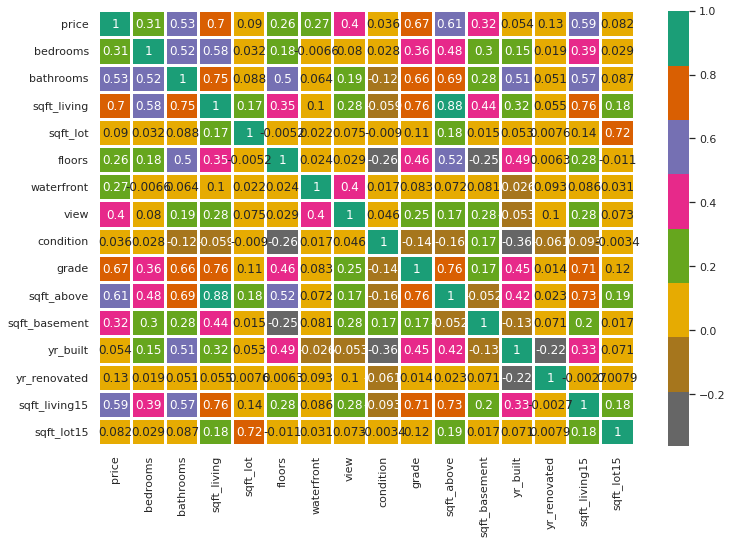

In [92]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [93]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [95]:
#tu codigo aquí
# Regresión lineal múltiple
linear_reg_mul = LinearRegression(fit_intercept=True)
linear_reg_mul.fit(X_train, y_train)
y_pred_mul=linear_reg_mul.predict(X_test)



In [96]:
print("Pendientes: ", linear_reg_mul.coef_)
print("Intercepción: ", linear_reg_mul.intercept_)

Pendientes:  [[-3.82008048e+04  4.14661380e+04  1.07992584e+02  1.71356997e-02
   3.16916913e+04  5.52691023e+05  4.12493228e+04  2.12221443e+04
   1.19493216e+05  4.77750271e+01  6.02175565e+01 -3.55090216e+03
   1.32602215e+01  2.90059284e+01 -5.48132603e-01]]
Intercepción:  [6151359.2627409]


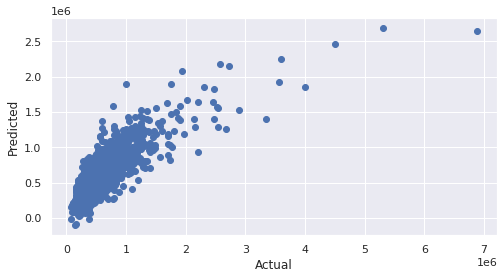

In [97]:
plt.scatter(y_test,y_pred_mul);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [98]:
print("-----------Precisión del modelo---------")
print("Entrenamiento:", linear_reg_mul.score(X_train, y_train))
print("Pruebas:", linear_reg_mul.score(X_test, y_test))
print("-----------Errores del modelo-----------")
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_mul))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mul)))
print("-----------R squared--------------------")
print('r2_score',r2_score(y_test, y_pred_mul))

-----------Precisión del modelo---------
Entrenamiento: 0.6529196653133833
Pruebas: 0.6579723205007814
-----------Errores del modelo-----------
Error medio Absoluto (MAE): 137480.1388273178
Root Mean Squared Error: 232133.3676240749
-----------R squared--------------------
r2_score 0.6579723205007814


In [99]:
#Regresión Múltiple Polinomial
poly_features_mul = PolynomialFeatures(degree=2, include_bias=False)
X_mipoly_mul = poly_features_mul.fit_transform(X_train)
X_mipoly_mul_test = poly_features_mul.fit_transform(X_test)
X_mipoly_mul

array([[5.00000000e+00, 2.75000000e+00, 3.75000000e+03, ...,
        9.73440000e+06, 2.26356000e+07, 5.26350250e+07],
       [4.00000000e+00, 4.50000000e+00, 5.25000000e+03, ...,
        6.25000000e+06, 1.20880000e+08, 2.33791590e+09],
       [3.00000000e+00, 2.50000000e+00, 2.88000000e+03, ...,
        8.76160000e+06, 3.11214400e+07, 1.10544196e+08],
       ...,
       [3.00000000e+00, 2.25000000e+00, 1.78000000e+03, ...,
        2.28010000e+06, 1.15137500e+07, 5.81406250e+07],
       [2.00000000e+00, 1.00000000e+00, 1.15000000e+03, ...,
        2.14036900e+06, 6.32016000e+06, 1.86624000e+07],
       [3.00000000e+00, 1.00000000e+00, 1.45000000e+03, ...,
        1.08160000e+06, 8.04960000e+06, 5.99076000e+07]])

In [100]:
lin_reg_poly_mul = LinearRegression(fit_intercept=True)
lin_reg_poly_mul.fit(X_mipoly_mul, y_train)

y_pred_pol_mul = lin_reg_poly_mul.predict(X_mipoly_mul_test)

print("Pendiente igual a", lin_reg_poly_mul.coef_)
print("Intercepción igual a", lin_reg_poly_mul.intercept_)

Pendiente igual a [[ 9.33912834e+05 -1.09330730e+06 -4.56449932e+02 -2.78686288e+01
  -2.07407238e+06 -3.95431870e+06 -2.88638026e+05  5.58697570e+05
   1.09864510e+06 -2.19758415e+02 -3.82034272e+02 -8.59630908e+04
  -2.95351595e+03  3.99965710e+03 -3.40106316e+01  9.57541696e+02
   7.49958190e+03 -1.37969466e+01 -1.84926695e-02  8.57699569e+03
  -1.14965893e+04 -3.06588900e+02 -5.24628836e+03 -5.36788065e+03
  -1.20757669e+00 -1.46068182e+01 -4.67099451e+02 -9.13191519e+00
   1.72800642e+01  2.15500198e-01 -9.63429892e+03  1.53879172e+01
  -1.35842369e-01 -2.59067293e+04  4.33707238e+04  3.82942459e+03
  -1.07592927e+03  2.22971689e+04  1.44292325e+01  1.33928361e+00
   5.03401980e+02 -1.70798805e+01 -1.72895923e+01 -5.56785248e-02
   1.56185890e+00 -4.34972758e+00  4.83299456e+00  1.60303193e+02
  -1.42711737e+01  1.31138593e+01  2.07283397e+01  2.61335089e+00
  -4.41381412e+00 -2.20765903e+00  6.36282684e-02  3.53629072e+00
   1.88176819e+01  3.06637958e-07  4.40839907e-01 -9.84216

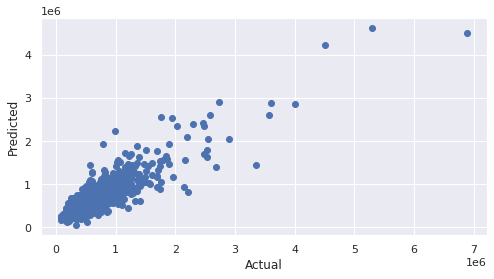

In [101]:
plt.scatter(y_test,y_pred_pol_mul);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [102]:
print("-----------Precisión del modelo---------")
print("Entrenamiento:", lin_reg_poly_mul.score(X_mipoly_mul, y_train))
print("Pruebas:", lin_reg_poly_mul.score(X_mipoly_mul_test, y_test))
print("-----------Errores del modelo-----------")
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_pol_mul))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_pol_mul)))
print("-----------R squared--------------------")
print('r2_score',r2_score(y_test, y_pred_pol_mul))

-----------Precisión del modelo---------
Entrenamiento: 0.7469519325162244
Pruebas: 0.7797929072570198
-----------Errores del modelo-----------
Error medio Absoluto (MAE): 121314.06948173394
Root Mean Squared Error: 186261.28575138954
-----------R squared--------------------
r2_score 0.7797929072570198


In [103]:
#Ridge y Lasso
Mod_Ridge_Mul = Ridge(alpha=0.1, solver="cholesky")
Regresion_Ridge_Mul = Mod_Ridge_Mul.fit(X_train, np.ravel(y_train))
y_pred_ridge_mul = Regresion_Ridge_Mul.predict(X_test)
  
print("Pendiente igual a", Regresion_Ridge_Mul.coef_)
print("Intercepción igual a", Regresion_Ridge_Mul.intercept_)

Pendiente igual a [-3.82026624e+04  4.14646154e+04  1.07995419e+02  1.71151609e-02
  3.16914389e+04  5.52244513e+05  4.12701376e+04  2.12225788e+04
  1.19490943e+05  4.77775251e+01  6.02157595e+01 -3.55086188e+03
  1.32659578e+01  2.90038360e+01 -5.48119073e-01]
Intercepción igual a 6151298.168406071


Text(0, 0.5, 'Predicted')

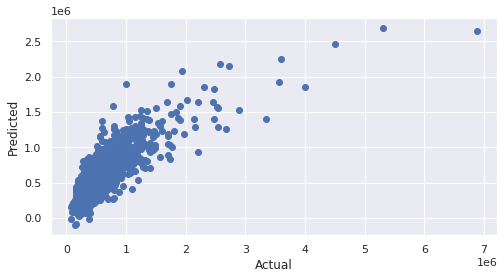

In [104]:
plt.scatter(y_test,y_pred_ridge_mul);
plt.xlabel('Actual');
plt.ylabel('Predicted')

In [105]:
print("-----------Precisión del modelo---------")
print("Entrenamiento:", Mod_Ridge_Mul.score(X_train, y_train))
print("Pruebas:", Mod_Ridge_Mul.score(X_test, y_test))
print("-----------Errores del modelo-----------")
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_ridge_mul))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge_mul)))
print("-----------R squared--------------------")
print('r2_score',r2_score(y_test, y_pred_ridge_mul))

-----------Precisión del modelo---------
Entrenamiento: 0.6529196557498437
Pruebas: 0.6579629179036365
-----------Errores del modelo-----------
Error medio Absoluto (MAE): 137481.23714210742
Root Mean Squared Error: 232136.5583622373
-----------R squared--------------------
r2_score 0.6579629179036365


In [106]:
Mod_Lasso_Mul = Lasso(alpha=30)
Regresion_Lasso_Mul = Mod_Lasso_Mul.fit(X_train, np.ravel(y_train))
y_pred_lasso_Mul = Regresion_Lasso_Mul.predict(X_test)

print("Pendiente igual a", Regresion_Lasso_Mul.coef_)
print("Intercepción igual a", Regresion_Lasso_Mul.intercept_)

Pendiente igual a [-3.81626952e+04  4.13377006e+04  2.93429446e+02  1.69101741e-02
  3.15551853e+04  5.48193558e+05  4.14186023e+04  2.11395225e+04
  1.19451859e+05 -1.37521709e+02 -1.25162539e+02 -3.54933897e+03
  1.33389557e+01  2.89879703e+01 -5.48236758e-01]
Intercepción igual a 6148984.797520088


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.057e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


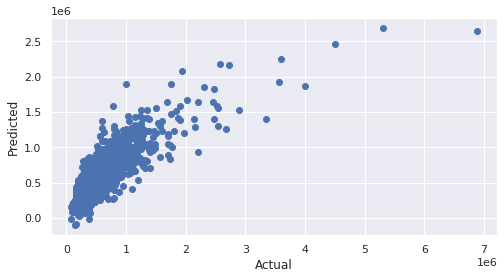

In [107]:
plt.scatter(y_test,y_pred_lasso_Mul);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [108]:
print("-----------Precisión del modelo---------")
print("Entrenamiento:", Regresion_Lasso_Mul.score(X_train, y_train))
print("Pruebas:", Regresion_Lasso_Mul.score(X_test, y_test))
print("-----------Errores del modelo-----------")
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_lasso_Mul))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso_Mul)))
print("-----------R squared--------------------")
print('r2_score',r2_score(y_test, y_pred_lasso_Mul))

-----------Precisión del modelo---------
Entrenamiento: 0.6529185861760567
Pruebas: 0.6578690543568155
-----------Errores del modelo-----------
Error medio Absoluto (MAE): 137493.12047308037
Root Mean Squared Error: 232168.4082217807
-----------R squared--------------------
r2_score 0.6578690543568155


----Resultados de MAE----
{'LINEAL': [137480.1388273178], 'POLYNOMIAL': 121314.06948173394, 'RIDGE': [137481.23714210742], 'LASSO': 137493.12047308037}
-------------------------


/usr/local/lib/python3.7/dist-packages/numpy/lib/stride_tricks.py:536: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


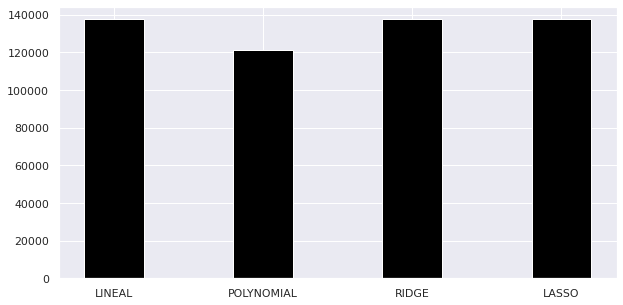

In [109]:
#Grafica
data_MAE_Mul = {'LINEAL': [metrics.mean_absolute_error(y_test, y_pred_mul)],
        'POLYNOMIAL': metrics.mean_absolute_error(y_test, y_pred_pol_mul),
        'RIDGE': [metrics.mean_absolute_error(y_test, y_pred_ridge_mul)],
        'LASSO': metrics.mean_absolute_error(y_test, y_pred_lasso_Mul)}

errores_MAE_Mul = list(data_MAE_Mul.keys())
values_MAE_Mul = list(data_MAE_Mul.values())
fig = plt.figure(figsize = (10, 5))

plt.bar(errores_MAE_Mul, values_MAE_Mul, color ='black', width = 0.4)

print("----Resultados de MAE----")
print(data_MAE_Mul)
print("-------------------------")

plt.show()

----Resultados de R2----
{'LIN_R2': 232133.3676240749, 'POLYN_R2': 186261.28575138954, 'RIDGE_R2': 232136.5583622373, 'LASSO_R2': 232168.4082217807}
------------------------


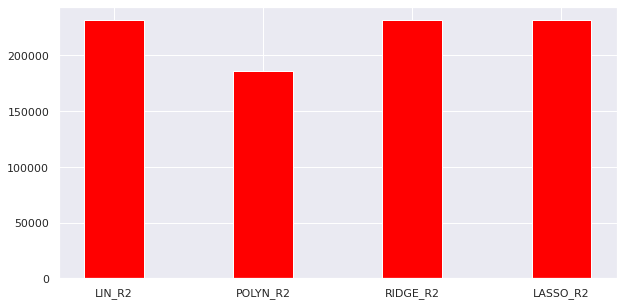

In [110]:
data_R2_MUL = {'LIN_R2': np.sqrt(metrics.mean_squared_error(y_test, y_pred_mul)),
        'POLYN_R2': np.sqrt(metrics.mean_squared_error(y_test, y_pred_pol_mul)),
        'RIDGE_R2': np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge_mul)),
        'LASSO_R2':np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso_Mul))}

errores_R2_MUL = list(data_R2_MUL.keys())
values_R2_MUL = list(data_R2_MUL.values())
fig = plt.figure(figsize = (10, 5))

plt.bar(errores_R2_MUL, values_R2_MUL, color ='RED', width = 0.4)

print("----Resultados de R2----")
print(data_R2_MUL)
print("------------------------")

plt.show()

**Eplica tus resultatos y conclusión**

De acuerdo a los resultados obtenidos podemos deducir que el modelo que mejor le conviene a la empresa es el polinomial habiéndolo ajustado los datos y al hacer las  predicciones de la variable de respuesta a valores de nuestro interés de la variable regresora, en cuanto a los porcentajes de entrenamiento y evaluación utilicé 80% y 20% respectivamente.
El error obtenido se encuentra en 137000 por lo que considero que es un error medianamente bueno ya que entre más cercano al 0 esté es mas preciso

Como podemos observar en los ejercicios realizados los modelos se utilizan para predicciones de variables al ajustar los datos estimando coeficientes a través de observar el comportamiento.
Lo primero que debemos hacer es elegir una familia de modelos adecuados a nuestros datos, después determinamos el grado de parametrización que se adecue al modelo.
Con las regresiones de Ridge la complejidad del modelo se disminuye la magnitud del coeficiente pero el coeficiente de valor absoluto nunca llega a cero mientras que en Lasso tiende al cero absoluto.

